In [2]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
red = pd.read_csv(url+'winequality-red.csv',sep=';')
white = pd.read_csv(url+'winequality-white.csv',sep=';')

In [3]:
print(red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [5]:
# 데이터 정보
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [6]:
wine.type.value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [7]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

In [8]:
wine_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# wine_norm # 섞기
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2593       0.206612          0.086667     0.174699        0.170245   0.064784   
1273       0.305785          0.333333     0.120482        0.021472   0.106312   
1348       0.280992          0.383333     0.018072        0.018405   0.114618   
665        0.330579          0.133333     0.132530        0.012270   0.078073   
1040       0.363636          0.400000     0.180723        0.023006   0.063123   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2593             0.166667              0.324885  0.148641  0.387597   
1273             0.114583              0.087558  0.150954  0.294574   
1348             0.020833              0.013825  0.168884  0.480620   
665              0.079861              0.285714  0.140544  0.434109   
1040             0.055556              0.304147  0.152111  0.387597   

      sulphates   alcohol   quality  type  
2593   0.089888  0.405797  0.333333   1.0 

In [10]:
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

[[0.20661157 0.08666667 0.1746988  0.1702454  0.06478405 0.16666667
  0.32488479 0.14864083 0.3875969  0.08988764 0.4057971  0.33333333
  1.        ]
 [0.30578512 0.33333333 0.12048193 0.02147239 0.10631229 0.11458333
  0.0875576  0.15095431 0.29457364 0.11797753 0.1884058  0.33333333
  0.        ]
 [0.28099174 0.38333333 0.01807229 0.01840491 0.11461794 0.02083333
  0.01382488 0.16888375 0.48062016 0.09550562 0.2173913  0.33333333
  0.        ]
 [0.33057851 0.13333333 0.13253012 0.01226994 0.07807309 0.07986111
  0.28571429 0.14054367 0.43410853 0.14606742 0.2173913  0.33333333
  1.        ]
 [0.36363636 0.4        0.18072289 0.02300613 0.06312292 0.05555556
  0.30414747 0.15211105 0.3875969  0.2752809  0.4057971  0.16666667
  1.        ]]


In [11]:
import tensorflow as tf
train_idx = int(len(wine_np)*0.8) 
train_X, train_Y = wine_np[:train_idx, : -1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, : -1], wine_np[train_idx:, -1]

In [12]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

NameError: name 'train_y' is not defined

In [13]:
# 원핫인코딩
import tensorflow as tf
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
train_Y[0]

array([0., 1.], dtype=float32)

In [14]:
# 분류 모델
model = tf.keras.Sequential([tf.keras.layers.Dense(units=48, activation = 'relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation = 'relu'),
                             tf.keras.layers.Dense(units=12, activation = 'relu'),
#                              tf.keras.layers.Dense(units=2, activation = 'softmax')
                             tf.keras.layers.Dense(units=2, activation = 'sigmoid')
                            ])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
#              loss='categorical_crossentropy', metrics = ['accuracy'])
             loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()
# Dense 완전연결층, 1차원배열의 형태로 데이터 학습, 이미지의 픽셀의 관계 고려 안함
#         2차원 형태의 이미지를 1차원으로 변환, 이미지 특성 잃어버림
# 대신 convolution conv2D층

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 학습
histroy = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split=0.25)

Epoch 1/25


InternalError:  Blas GEMM launch failed : a.shape=(32, 12), b.shape=(12, 48), m=32, n=48, k=12
	 [[node sequential/dense/MatMul (defined at <ipython-input-15-6775cf9a0f6a>:2) ]] [Op:__inference_train_function_792]

Function call stack:
train_function


NameError: name 'history' is not defined

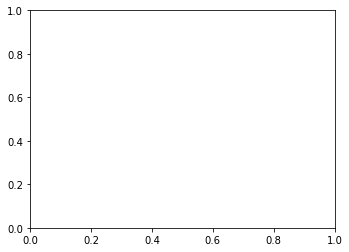

In [16]:
# 결과 시각화 loss acc
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.set_xlabel('epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.set_xlabel('epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [ ]:
# 모델평가
model.evaluate(test_X, test_Y)